In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
real = pd.read_excel(r"C:\Users\LENOVO\OneDrive\Desktop\Machine\Real estate valuation data set.xlsx")


In [17]:
real.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [18]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [19]:
real['X2 house age'].value_counts()

X2 house age
0.0     17
13.6     7
13.3     6
16.2     6
13.2     6
        ..
26.8     1
7.6      1
1.9      1
18.5     1
18.8     1
Name: count, Length: 236, dtype: int64

In [20]:
real.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [21]:
%matplotlib inline

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

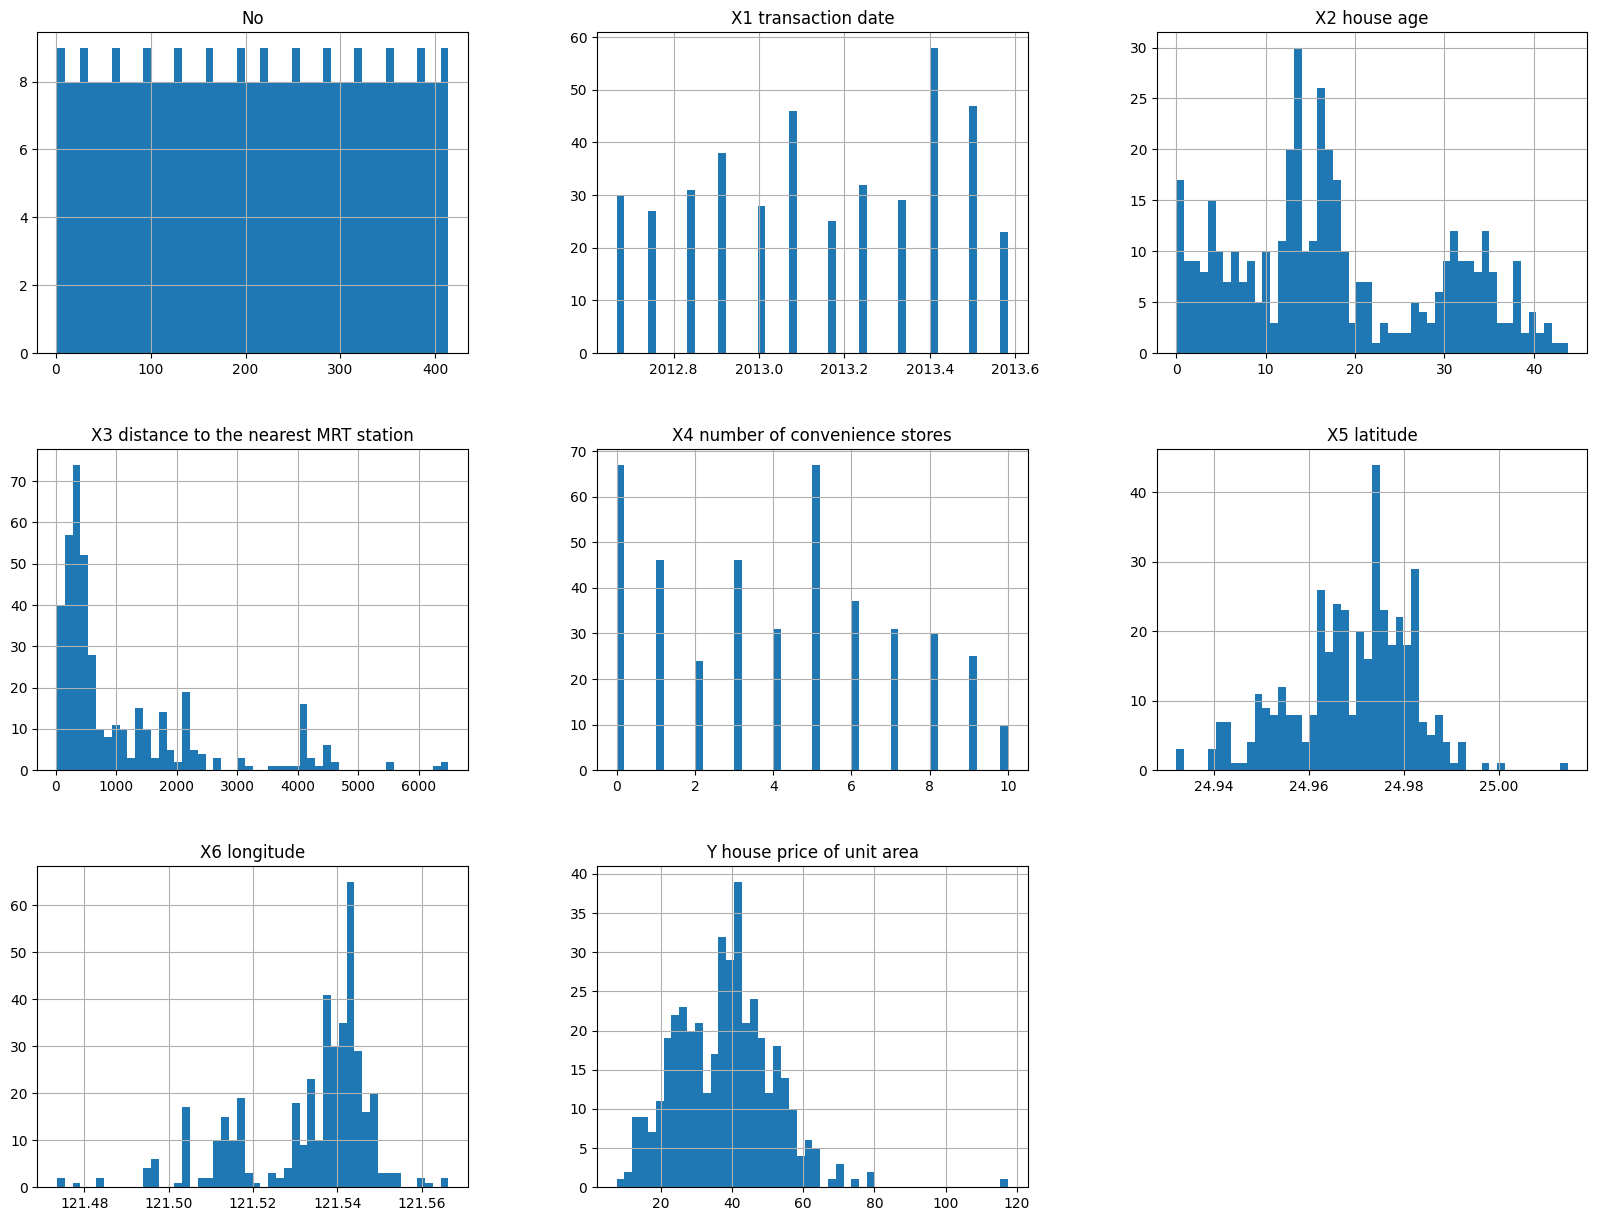

In [22]:
real.hist(bins=50, figsize=(20, 15))

Train-Test Splitting

In [23]:

def split_train_test(data, test_ratio):
    np.random.seed(50)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [24]:
train_set, test_set = split_train_test(real, 0.2)

[150 269  89 403 115 310 227 160 272 349  29 121  86 204  37  88 166  63
 196 107  34 253 153 329 213 231 188 102 234 369 302  11  20 311  31 135
 208 336   1 301 313 151 362 206 214   2  87 361  67 148 404 354 216  97
 116 217 144 126 141 292 401 202  77 346 294 215 182 339  46 274   9  18
 112 260   3 375 264  55  65  16 103 185 124 162 127  44 319  43 382  81
   8  61 219 307  73 225 198 328  98 100  50  24 136 203 158 398 296 271
 325 168 246 334 209 347 167 268 201 120 157 378 368 145 247 243  74 114
  25  99  90 230 364 181 146  48 191  85 279  15 138 108 238 390 207 363
 392 137 194  66 389 184  39 376 280  19 248  84 381 370  41 177 276  72
  82  10 161 318  22 251 159 235 257 407 242  32 282 410  83  33 326 350
 374 226 249  53 281 220  76 344  12 222 332 342 304 119 315 340 129 178
  69 293 123 290 195 210  38 175  23 261 223 232 212 284 183 125 297 180
 335 295 379 365  96 236 387  40 330 172 244  42 327 411 200 273 270 355
 373 122 170 140 190  59 385  35 263 316 345 259 14

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(real, test_size=0.2, random_state=50)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(train_set)}\n")


Rows in train set: 331
Rows in test set: 331



In [26]:

from sklearn.model_selection import StratifiedShuffleSplit

# Create a new column with binned values for stratification
real["MRT_dist_cat"] = pd.cut(real["X3 distance to the nearest MRT station"],
                              bins=[0, 1000, 2000, 3000, 4000, float("inf")],
                              labels=[1, 2, 3, 4, 5])

# Now use stratified sampling on the new categorical column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)

for train_index, test_index in split.split(real, real["MRT_dist_cat"]):
    strat_train_set = real.loc[train_index]
    strat_test_set = real.loc[test_index]

# Optionally drop the helper column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("MRT_dist_cat", axis=1, inplace=True)


In [27]:
strat_test_set['X1 transaction date']

119    2013.500000
40     2013.000000
328    2012.833333
15     2013.583333
71     2013.083333
          ...     
8      2013.500000
236    2013.166667
7      2013.416667
132    2013.166667
323    2013.416667
Name: X1 transaction date, Length: 83, dtype: float64

Looking for Correlations

In [28]:
corr_matrix = real.corr()

In [29]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
No                                       -0.028587
X2 house age                             -0.210567
MRT_dist_cat                             -0.646194
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

In [30]:
strat_train_set["Y house price of unit area"].value_counts()


Y house price of unit area
31.3    4
42.3    4
42.0    4
46.6    3
27.0    3
       ..
50.4    1
41.2    1
36.5    1
38.4    1
63.2    1
Name: count, Length: 237, dtype: int64

In [31]:
real = strat_train_set.copy()

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X6 longitude', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X1 transaction date'>,
        <Axes: xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <Axes: xlabel='X5 latitude', ylabel='X1 transaction date'>,
        <Axes: xlabel='X6 longitude', ylabel='X1 transaction date'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X5 latitude'>,
        <Axes: xlabel='X1 transaction date', ylabel='X5 latitude'>,
        <Axes: xlabel='X5 latitude', ylabel='X5 latitude'>,
        <Axes: xlabel='X6 longitude', ylabel='X5 latitude'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X6 longitude'>,
        <Axes: xlabel='X1 transaction

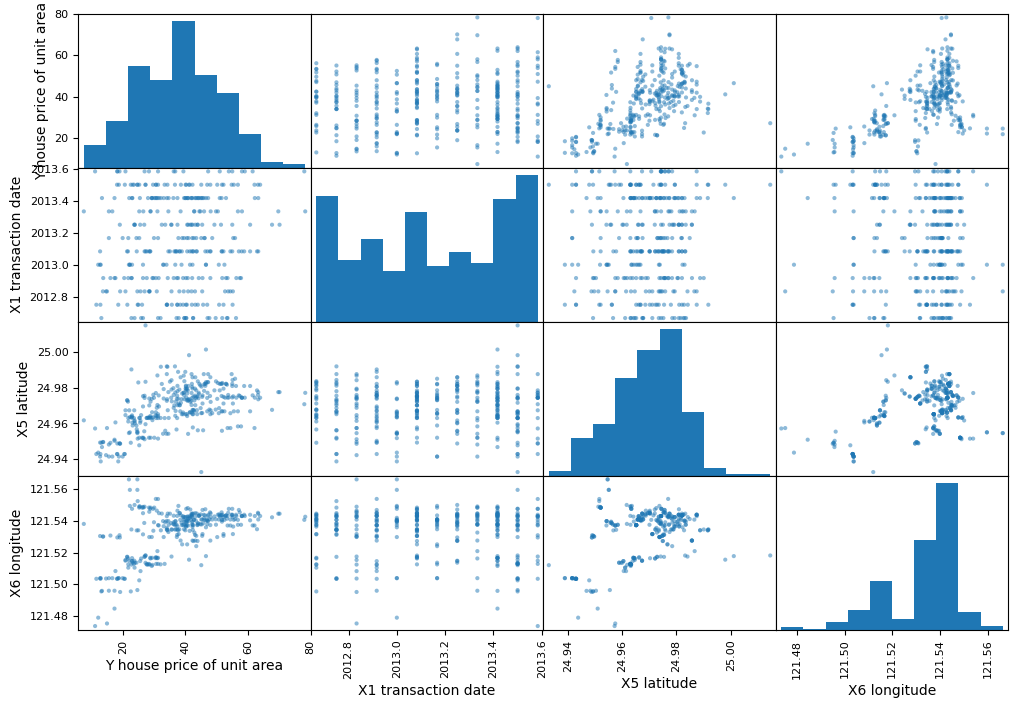

In [32]:
from pandas.plotting import scatter_matrix

attributes = ['Y house price of unit area', 'X1 transaction date', 'X5 latitude', 'X6 longitude']
scatter_matrix(real[attributes], figsize=(12, 8))


<Axes: xlabel='X5 latitude', ylabel='X6 longitude'>

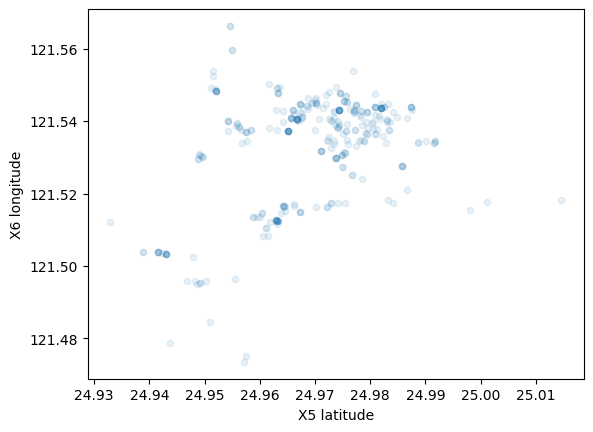

In [33]:
real.plot(kind="scatter", x="X5 latitude", y="X6 longitude", alpha=0.1)


In [34]:
# Remove the target column from features
real = strat_train_set.drop("X4 number of convenience stores", axis=1)

# Separate the target column as labels
real_labels = strat_train_set["X4 number of convenience stores"].copy()


## Attribute Combinations


In [35]:
real["X3 distance to the nearest MRT stationX4 number of convonience store"] = (
    strat_train_set['X3 distance to the nearest MRT station'] / 
    strat_train_set["X4 number of convenience stores"]
)


In [36]:
real.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area,X3 distance to the nearest MRT stationX4 number of convonience store
311,312,2013.166667,21.3,537.7971,24.97425,121.53814,42.2,134.449275
36,37,2012.916667,14.7,1935.0090,24.96386,121.51458,22.9,967.504500
232,233,2012.916667,27.1,4412.7650,24.95032,121.49587,17.4,4412.765000
251,252,2012.916667,31.7,1159.4540,24.94960,121.53018,13.8,inf
44,45,2013.583333,2.7,533.4762,24.97445,121.54765,53.9,133.369050


In [37]:
strat_train_set = strat_train_set.dropna(subset=["X4 number of convenience stores"])


In [38]:
print(real.columns.tolist())


['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude', 'Y house price of unit area', 'X3 distance to the nearest MRT stationX4 number of convonience store']


In [39]:
median = strat_train_set["X4 number of convenience stores"].median()


In [40]:
median = strat_train_set["X4 number of convenience stores"].median()
strat_train_set["X4 number of convenience stores"].fillna(median, inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2272\3176019966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  strat_train_set["X4 number of convenience stores"].fillna(median, inplace=True)


In [41]:
real.shape

(331, 8)

In [42]:
real = strat_train_set.copy()


In [43]:
real.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,206.217523,2013.148036,17.161027,1072.071980,4.126888,24.969053,121.532976,37.885196
std,120.332926,0.280671,11.207431,1257.472352,2.922572,0.012250,0.015213,13.149812
min,2.000000,2012.666667,0.000000,23.382840,0.000000,24.932930,121.473530,7.600000
25%,99.500000,2012.916667,8.400000,289.324800,1.000000,24.962990,121.527590,27.700000
50%,210.000000,2013.166667,15.700000,492.231300,4.000000,24.970710,121.538050,38.900000
75%,311.000000,2013.416667,26.950000,1442.932500,6.000000,24.977230,121.543100,46.300000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


In [44]:
import numpy as np
from sklearn.impute import SimpleImputer

# 1. Select only numeric columns
real_num = real.select_dtypes(include=["number"])

# 2. Replace infinite values with NaN
real_num.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. Apply median imputation
imputer = SimpleImputer(strategy="median")
imputer.fit(real_num)


SimpleImputer(strategy='median')

In [45]:
imputer.statistics_.shape


(8,)

In [46]:

# 1. Select numeric columns
real_num = real.select_dtypes(include=["number"])

# 2. Replace inf and -inf with NaN
real_num.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. Fit the imputer
imputer = SimpleImputer(strategy="median")
imputer.fit(real_num)

# 4. Transform the data
X = imputer.transform(real_num)


In [47]:
real.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,206.217523,2013.148036,17.161027,1072.071980,4.126888,24.969053,121.532976,37.885196
std,120.332926,0.280671,11.207431,1257.472352,2.922572,0.012250,0.015213,13.149812
min,2.000000,2012.666667,0.000000,23.382840,0.000000,24.932930,121.473530,7.600000
25%,99.500000,2012.916667,8.400000,289.324800,1.000000,24.962990,121.527590,27.700000
50%,210.000000,2013.166667,15.700000,492.231300,4.000000,24.970710,121.538050,38.900000
75%,311.000000,2013.416667,26.950000,1442.932500,6.000000,24.977230,121.543100,46.300000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


Scikit-learn Design


Creating a Pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler()),
])


In [49]:
real_num_tr = my_pipeline.fit_transform(real_num)

In [50]:
real_num_tr.shape

(331, 8)

Selecting a desired model for Padhan real estate


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()


#model.fit(real_num[:15], real_labels[:15])
 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(real_num_tr, real_labels)  # make sure these variables are defined


RandomForestRegressor()

In [52]:
some_data = real.iloc[:5]
some_data = real_labels.iloc[:5]

In [53]:
some_data = real.iloc[[0]]  # This is a DataFrame (2D)
prepared_data = my_pipeline.transform(some_data)


In [54]:
model.predict(prepared_data)

array([4.])

In [55]:
some_label = real_labels.iloc[0]   # this is a scalar
print(some_label)


4


Evaluting the model

In [56]:
from sklearn.metrics import mean_squared_error

real_predictions = model.predict(real_num_tr)
lin_mse = mean_squared_error(real_labels, real_predictions)
lin_mse = np.sqrt(lin_mse)

In [57]:
lin_mse

np.float64(0.0070389507594926445)

 using better evaluation technique - Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score
import numpy as np  # ensure this is imported

scores = cross_val_score(model, real_num_tr, real_labels, scoring="neg_mean_squared_error", cv=15)
rmse_scores = np.sqrt(-scores)


In [59]:
rmse_scores

array([0.01503619, 0.02771609, 0.01066004, 0.00852803, 0.        ,
       0.04903616, 0.05204893, 0.02558409, 0.        , 0.06182821,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [60]:
def print_scores(scores):
    print("RMSE scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Mean: 0.016695848821808506
Standard deviation: 0.020960710839991407


In [61]:
print_scores(rmse_scores)

RMSE scores: [0.01503619 0.02771609 0.01066004 0.00852803 0.         0.04903616
 0.05204893 0.02558409 0.         0.06182821 0.         0.
 0.         0.         0.        ]


Saving the model

In [62]:
from joblib import dump

# Step 1: Create the model
clf = RandomForestRegressor()

# Step 2: Fit the model (make sure real_num_tr and real_labels are already defined)
clf.fit(real_num_tr, real_labels)

# Step 3: Save the model
dump(clf, "Dragon.joblib")

['Dragon.joblib']

Testing the model on Test data

In [63]:
real = strat_train_set.drop("X4 number of convenience stores", axis=1)
real_labels = strat_train_set["X4 number of convenience stores"].copy()
my_pipeline.fit(real)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scalar', StandardScaler())])

In [64]:
real_predictions = model.predict(real_num_tr)
lin_mse = mean_squared_error(real_labels, real_predictions)
lin_mse = np.sqrt(lin_mse)
print(lin_mse)

0.0070389507594926445
